In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [17]:
import yfinance as yf

# Define the stock tickers
tickers = ['TSLA', 'BND', 'SPY']

# Download historical data
data = yf.download(tickers, start='2015-01-01', end='2025-01-01')

# Check the columns to understand the data structure
print(data.columns)


[*********************100%***********************]  3 of 3 completed

MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [18]:

print(data.head())
print(data.columns)


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573109  172.592911  14.620667  62.603393  173.811145   
2015-01-05  62.754841  169.475906  14.006000  62.777553  171.702310   
2015-01-06  62.936516  167.879639  14.085333  63.125787  170.316081   
2015-01-07  62.974384  169.971603  14.063333  63.050092  170.316070   
2015-01-08  62.875984  172.987762  14.041333  62.921407  173.206211   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.398976  171.542718  14.217333  62.406549   
2015-01-05  14.433333  62.610993  169.165053  13.810667  62.641277   
2015-01-06  14.280000  62.860808  167.073085  13.614000  62.860808   
2015-01-07 

In [19]:
# Check basic statistics
print(data.describe())

# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())


Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      69.271660   313.957382   115.679423    69.373264   315.610190   
std        4.805706   115.831464   114.226440     4.813920   116.392583   
min       61.860870   156.800842     9.578000    61.937335   157.864136   
25%       65.540466   214.664433    17.185167    65.615716   215.321668   
50%       68.239468   276.422562    28.505667    68.364115   277.178241   
75%       72.892389   404.020775   220.205002    72.966635   406.288479   
max       78.823250   605.771179   479.859985    78.920165   607.026962   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     118.250154    6

In [20]:
# Option 1: Interpolate missing values
data = data.interpolate(method='linear')

# Option 2: Fill forward/backward
# data = data.fillna(method='ffill').fillna(method='bfill')

# Double-check for any remaining missing values
print(data.isnull().sum())


Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Compare original and scaled data
print(scaled_data.head())


Price          Close                          High                      \
Ticker           BND       SPY      TSLA       BND       SPY      TSLA   
Date                                                                     
2015-01-02  0.041989  0.035174  0.010723  0.039220  0.035504  0.009519   
2015-01-05  0.052703  0.028231  0.009416  0.049475  0.030809  0.008578   
2015-01-06  0.063414  0.024676  0.009584  0.069980  0.027723  0.008257   
2015-01-07  0.065646  0.029335  0.009538  0.065522  0.027723  0.008338   
2015-01-08  0.059845  0.036053  0.009491  0.057945  0.034157  0.008201   

Price            Low                          Open                      \
Ticker           BND       SPY      TSLA       BND       SPY      TSLA   
Date                                                                     
2015-01-02  0.033972  0.037454  0.010743  0.030311  0.037917  0.011513   
2015-01-05  0.046469  0.032174  0.009835  0.044124  0.033785  0.010324   
2015-01-06  0.061194  0.027528  0.009

In [24]:
# Flatten the columns if multi-indexed
data.columns = ['_'.join(col).strip() for col in data.columns]

print(data.columns)


Index(['Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')


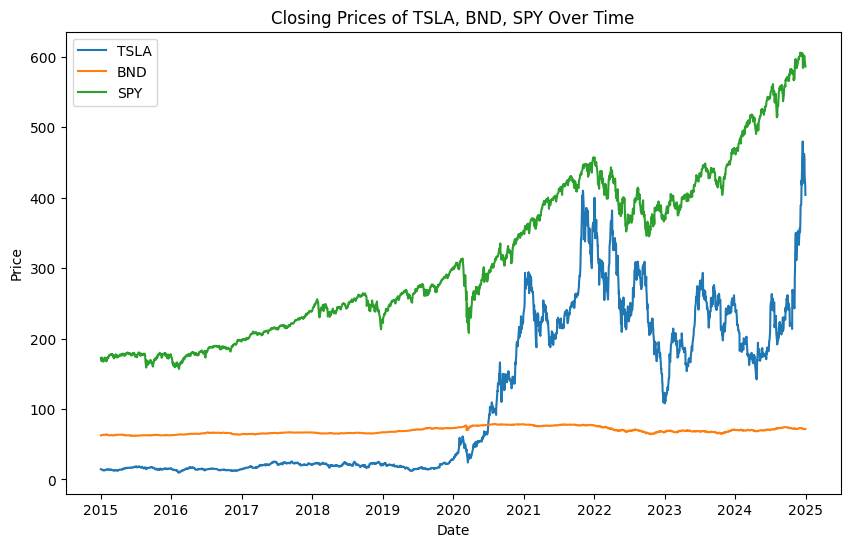

In [27]:
# Plotting the closing prices
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(data.index, data[f'Close_{ticker}'], label=ticker)

plt.title('Closing Prices of TSLA, BND, SPY Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [33]:
 #Flatten the multi-index columns if needed
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Display the columns to verify the structure
print("Original Columns:", data.columns)

# Rename 'Close' columns to match ticker names directly
rename_mapping = {
    'Close_TSLA': 'TSLA',
    'Close_BND': 'BND',
    'Close_SPY': 'SPY'
}

# Only rename if the expected columns exist
available_columns = set(data.columns)
for original, new_name in rename_mapping.items():
    if original in available_columns:
        data = data.rename(columns={original: new_name})

# Verify column names after renaming
print("Renamed Columns:", data.columns)

# Calculate daily percentage change (returns)
returns = data[['TSLA', 'BND', 'SPY']].pct_change().dropna()

# Verify the columns of the 'returns' DataFrame
print("Returns Columns:", returns.columns)

Original Columns: Index(['Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Renamed Columns: Index(['BND', 'SPY', 'TSLA', 'High_BND', 'High_SPY', 'High_TSLA', 'Low_BND',
       'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY', 'Open_TSLA',
       'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Returns Columns: Index(['TSLA', 'BND', 'SPY'], dtype='object')


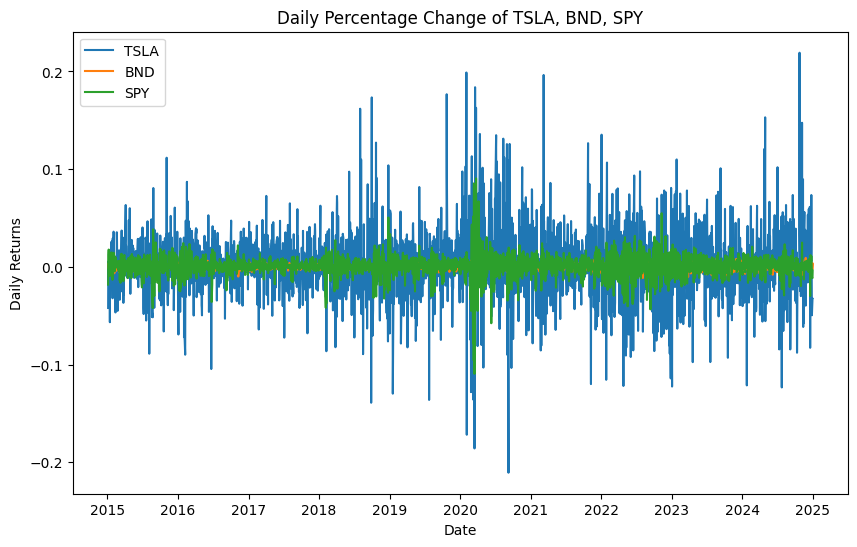

In [ ]:
#Plotting the Daily Percentage Changes:
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.title('Daily Percentage Change of TSLA, BND, SPY')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()



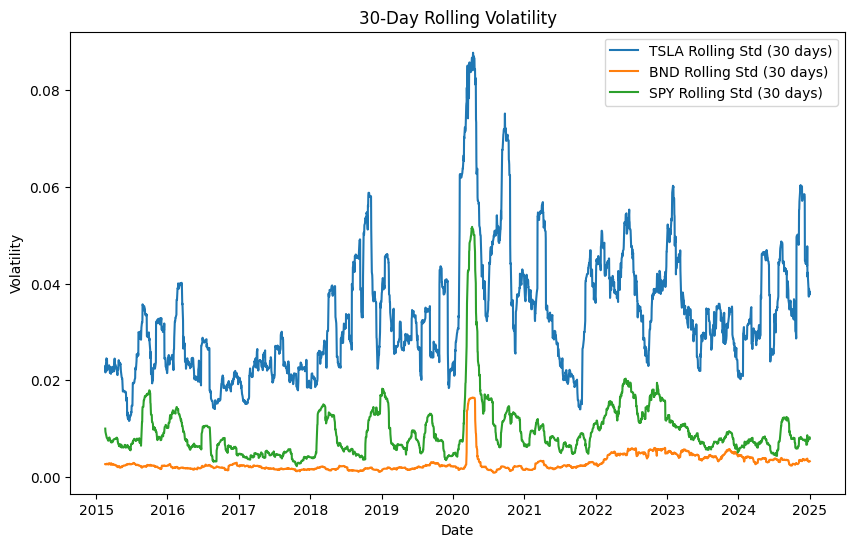

In [36]:
# Volatility Analysis: Rolling Means & Standard Deviations
window_size = 30  # 30-day rolling window

plt.figure(figsize=(10, 6))
for ticker in tickers:
    rolling_std = returns[ticker].rolling(window=window_size).std()
    plt.plot(rolling_std, label=f'{ticker} Rolling Std (30 days)')

plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


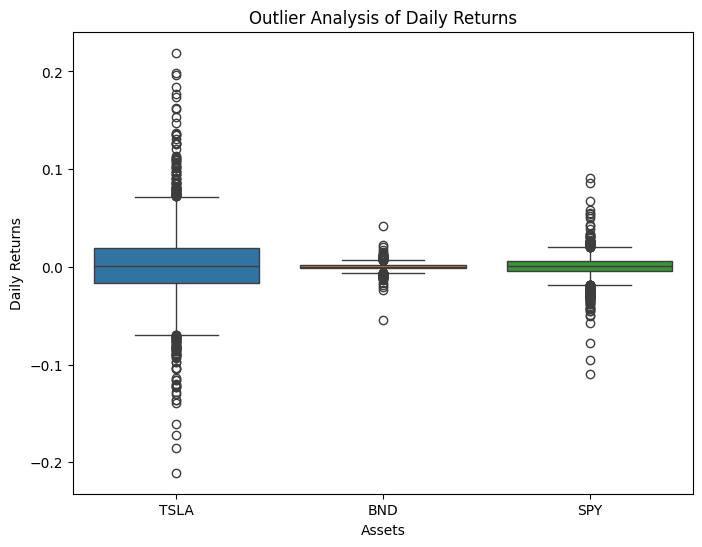

Outliers for TSLA:
count    52.000000
mean      0.009947
std       0.138615
min      -0.210628
25%      -0.120241
50%       0.009717
75%       0.134925
max       0.219190
Name: TSLA, dtype: float64
Outliers for BND:
count    52.000000
mean     -0.000270
std       0.015556
min      -0.054385
25%      -0.010241
50%      -0.000176
75%       0.010628
max       0.042201
Name: BND, dtype: float64
Outliers for SPY:
count    52.000000
mean     -0.002104
std       0.047870
min      -0.109424
25%      -0.038554
50%      -0.002813
75%       0.032731
max       0.090603
Name: SPY, dtype: float64


In [37]:
# Plotting boxplots to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=returns)
plt.title('Outlier Analysis of Daily Returns')
plt.xlabel('Assets')
plt.ylabel('Daily Returns')
plt.show()

# Analyzing extreme values
for ticker in tickers:
    outliers = returns[(returns[ticker] > returns[ticker].quantile(0.99)) | 
                       (returns[ticker] < returns[ticker].quantile(0.01))]
    print(f'Outliers for {ticker}:')
    print(outliers[ticker].describe())


<Figure size 1000x800 with 0 Axes>

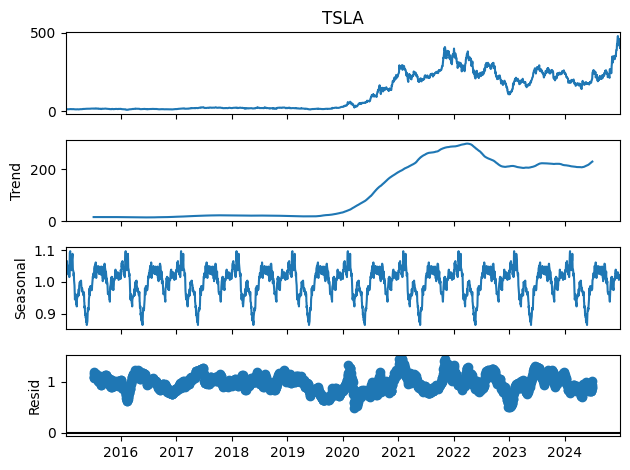

In [38]:
# Decomposition for Tesla stock
decompose_result = seasonal_decompose(data['TSLA'], model='multiplicative', period=252)

# Plotting the decomposition
plt.figure(figsize=(10, 8))
decompose_result.plot()
plt.show()


In [39]:
 #Key Financial Metrics: VaR & Sharpe Ratio
# Value at Risk (VaR)
# 95% VaR assuming normal distribution
var_95 = returns['TSLA'].quantile(0.05)
print(f"95% Value at Risk (VaR) for TSLA: {var_95:.4f}")


95% Value at Risk (VaR) for TSLA: -0.0514


In [40]:
#Sharpe Ratio
# Assuming a risk-free rate of 3% annualized
risk_free_rate = 0.03
trading_days = 252

sharpe_ratio = (returns.mean() * trading_days - risk_free_rate) / (returns.std() * np.sqrt(trading_days))
print(f"Sharpe Ratio for TSLA: {sharpe_ratio['TSLA']:.4f}")


Sharpe Ratio for TSLA: 0.8141
